In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import tqdm # interactive progress bar

plt.style.use('ggplot')
%matplotlib inline


In [234]:
# help(pd.read_csv)
url_to_data = 'data/data2017w33_decided_in_48hrs.csv'
data = pd.read_csv(url_to_data, names=['CLIENT_CATEGORY', 'SEGMENT', 'Service', 'Channeltype', 'Source', 'football',
'DECLARED_FAULT', 'CREATE_DATE', 'CLOSETIME', 'all_num_of_repeat', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10',
'num_of_repeat30', 'num_of_repeat60', 'MITYPE', 'MIPRIORITY', 'MIIMPACT', 'TECHNICAL_DISTRICT', 'NumWFMforEI',
'Last_WFM_days_waiting', 'EIDayOfWeek', 'EIHourCreate'], na_values='0', delimiter=';', skiprows=[0])

In [235]:
data.shape

(7961, 23)

In [236]:
# data.columns=['A' + str(i) for i in range(len(data.columns))]
# data.head()

In [237]:
# data.describe()

In [238]:
# extract categorical and numerical features
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print('Categorical columns: ', categorical_columns)
print('Numerical columns: ', numerical_columns)

Categorical columns:  ['CLIENT_CATEGORY', 'SEGMENT', 'DECLARED_FAULT']
Numerical columns:  ['Service', 'Channeltype', 'Source', 'football', 'CREATE_DATE', 'CLOSETIME', 'all_num_of_repeat', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10', 'num_of_repeat30', 'num_of_repeat60', 'MITYPE', 'MIPRIORITY', 'MIIMPACT', 'TECHNICAL_DISTRICT', 'NumWFMforEI', 'Last_WFM_days_waiting', 'EIDayOfWeek', 'EIHourCreate']


In [239]:
data[numerical_columns].describe()

,Service,Channeltype,Source,football,CREATE_DATE,CLOSETIME,all_num_of_repeat,num_of_repeat2,num_of_repeat5,num_of_repeat10,num_of_repeat30,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate
count,7961.000000,7172.000000,7961.000000,7961.000000,7.961000e+03,7.961000e+03,7122.000000,249.000000,2575.000000,7122.000000,7122.000000,7122.000000,260.000000,224.000000,221.000000,5268.000000,5268.000000,3433.000000,7961.000000,7882.000000
mean,8787.997990,9287.141523,8695.436754,3.447306,1.502927e+09,1.502980e+09,2.126509,1.052209,1.097864,1.137040,1.242067,1.350885,1.084615,2.883929,2.886878,34.921982,1.036067,1.154675,3.848511,14.525882
std,306.997697,318.724866,377.379111,1.460886,1.658583e+05,1.735481e+05,2.904872,0.222896,0.345545,0.410207,0.585443,0.796191,0.563149,1.030874,1.000391,8.877913,0.191497,0.507194,1.790585,4.152670
min,8676.000000,9203.000000,7470.000000,1.000000,1.502669e+09,1.502686e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,8678.000000,9204.000000,8750.000000,3.000000,1.502790e+09,1.502824e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,28.000000,1.000000,1.000000,2.000000,11.000000
50%,8678.000000,9204.000000,8750.000000,3.000000,1.502898e+09,1.502966e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,36.000000,1.000000,1.000000,4.000000,14.000000
75%,8680.000000,9204.000000,8750.000000,4.000000,1.503053e+09,1.503089e+09,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,42.000000,1.000000,1.000000,5.000000,18.000000
max,9650.000000,10769.000000,10867.000000,29.000000,1.503273e+09,1.503423e+09,96.000000,2.000000,4.000000,5.000000,8.000000,12.000000,6.000000,5.000000,4.000000,64.000000,3.000000,14.000000,7.000000,23.000000


In [240]:
data[categorical_columns].describe() # Stats for categorial features

,CLIENT_CATEGORY,SEGMENT,DECLARED_FAULT
count,7920,7957,7961
unique,25,6,167
top,ФЛ,МР,"Телефония. Тишина в трубке, нет зуммера"
freq,6116,6316,755


In [241]:
# data.describe(include=[object]) # Another way to do the same

In [242]:
## Legends
LEGEND={'Channeltype':{
'9207':'Медная линия',
'9205':'Канальная АТШ',
'9204': 'Канальная PON',
'9986':'Канальная Radio',
'9206':'Кодер видеонаблюдения',
'9636':'IP ОПС',
'9987':'Канальная Радио (юрики)',
'9203':'Канал ADSL',
'9633':'Канальная FTTB',
'9632':'ОПС',
'9202':'Камера видеонаблюдения',
'10769':'Канальная МЕДЬ',
'9197':'RFC PON',
'9198':'RFC АТШ',
'9199':'Интернет PON',
'9200':'Интернет АТШ',
'9201':'Интернет АТШ (юрики)',
'9208':'Телевидение PON',
'9209':'Телевидение АТШ',
'9210':'Телефон PON',
'9211':'Телефон АТШ',
'9212':'УПАТС PON',
'9630':'Телефон FTTB',
'9631':'Телевидение FTTB',
'9634':'Интернет FTTB',
'9635':'RFC FTTB'},
'Service':{
'9650':'Все сервисы',
'9697':'ОПС',
'8677':'Не сетевой инцидент',
'8679':'Телевидение',
'8681':'Технологические сервисы',
'8676':'Дополнительные сервисы',
'8678':'Передача данных',
'8680':'Телефония',
'8682':'Энергетическое и климатическое обеспечение технологических площадок'}}

In [243]:
stats=dict()
stat=dict()
for i in ['CLIENT_CATEGORY', 'SEGMENT', 'DECLARED_FAULT', 'Service', 'Channeltype', 'football', 'TECHNICAL_DISTRICT',
          'EIDayOfWeek', 'EIHourCreate']:
    stats[i]=data[i].value_counts()
    stat[i]=pd.Series(stats[i])
# print(stats.keys())
# print(stats['Service'])
stats['Service']

8678    4230
8680    2003
9650     896
8679     803
8677      16
8676      10
8681       3
Name: Service, dtype: int64

In [244]:
stats['CLIENT_CATEGORY'].values

array([6116,  602,  182,  169,  164,  153,   96,   88,   68,   51,   45,
         40,   34,   20,   19,   17,   14,   12,   11,    8,    6,    2,
          1,    1,    1], dtype=int64)

In [245]:
LEGEND['Channeltype'].keys()

dict_keys(['9207', '9205', '9204', '9986', '9206', '9636', '9987', '9203', '9633', '9632', '9202', '10769', '9197', '9198', '9199', '9200', '9201', '9208', '9209', '9210', '9211', '9212', '9630', '9631', '9634', '9635'])

In [246]:
cat_features=set()
for feature in sorted(stats.keys()):
    d_first=20
#     print(len(stats[feature]))
    if len(stats[feature])< 20:
        d_first = len(stats[feature])
    print("\n"+feature+"\n")
    for i in stats[feature].keys()[:d_first]:
        if type(i) == str:
            print(stats[feature][i], "\t", i)
        else:
            cat_features.add(feature)
# print(cat_features)
if cat_features:
    for feature in cat_features:
        try:
            if LEGEND[feature]:
            
                print("\n", feature, "\n")
                for i in stats[feature].keys():
                    print(stats[feature][i], "\t", LEGEND[feature][str(int(i))])
        except:
                pass
#     print(stats[feature].keys()[:d_first], stats[feature].values[:d_first])
    


CLIENT_CATEGORY

6116 	 ФЛ
602 	 SOHO
182 	 Выделенное обслуживание (пилот)
169 	 NKA
164 	 SME
153 	 GS-SLA4
96 	 Оператор
88 	 SME GS
68 	 Corporate
51 	 GS-SLA1
45 	 SOHO_GS
40 	 KA
34 	 Corporate GS
20 	 GS-Имидж абоненты
19 	 Имидж-абоненты (физические лица)
17 	 KA GS
14 	 GS-SLA3
12 	 INDIVIDUAL
11 	 Развитие
8 	 СПЕЦ

Channeltype


DECLARED_FAULT

755 	 Телефония. Тишина в трубке, нет зуммера
666 	 ONT не на линии. Проблема с оптическим кабелем
616 	 Телефония. Тишина в трубке
437 	 Интернет. Не работает интернет
375 	 Не работает ONT. Нет индикации питания.
362 	 ТВ. Не получен IP-адрес
329 	 Интернет. Не открываются все страницы
293 	 ТВ. Черный или синий экран
251 	 ТВ. Проблемы с пультом
195 	 Swap ONT Huawei
184 	 Телефония. Зуммер занято
172 	 ONT на линии. Высокое затухание
170 	 Интернет. Другое
155 	 SLX_Не работает INTERNET
154 	 Перенос/замена модели ONT
139 	 ТВ. Другое
137 	 ТВ. Рассыпание/замирание
130 	 Интернет. Не открываются страницы
117 	 Телефония. Не работ

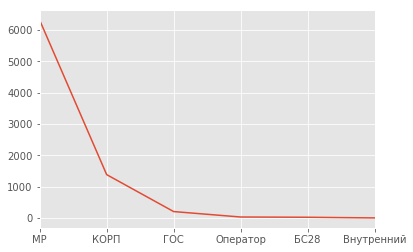

In [247]:
stats['SEGMENT'][:6].plot()

In [248]:
# data.head()

In [249]:
for i in data:
    print(data[i].describe())

count     7920
unique      25
top         ФЛ
freq      6116
Name: CLIENT_CATEGORY, dtype: object
count     7957
unique       6
top         МР
freq      6316
Name: SEGMENT, dtype: object
count    7961.000000
mean     8787.997990
std       306.997697
min      8676.000000
25%      8678.000000
50%      8678.000000
75%      8680.000000
max      9650.000000
Name: Service, dtype: float64
count     7172.000000
mean      9287.141523
std        318.724866
min       9203.000000
25%       9204.000000
50%       9204.000000
75%       9204.000000
max      10769.000000
Name: Channeltype, dtype: float64
count     7961.000000
mean      8695.436754
std        377.379111
min       7470.000000
25%       8750.000000
50%       8750.000000
75%       8750.000000
max      10867.000000
Name: Source, dtype: float64
count    7961.000000
mean        3.447306
std         1.460886
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        29.000000
Name: football, dtype: float64
co

In [250]:
# Cleaning the data
# dropped_data_without_empty_cols = data.dropna(axis=1)
# dropped_data_without_empty_rows = data.dropna(axis=0)
# data.count(axis=0)



for item in ['all_num_of_repeat', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10', 'num_of_repeat30', 'num_of_repeat60']:
    data[item]=data[item][data[item].isin([i for i in range(1000)] + [str(i) for i in range(1000)])]
    data[item]=data[item].replace(to_replace=[np.nan], value=[0])

    

# for col_name in ['SERVICE', 'channeltype', 'source']:
#     data[col_name]=data[col_name].replace(to_replace=[np.nan], value=[0])
#     data[col_name]=data[col_name].replace(to_replace=data[col_name].unique(), value=[i for i in range(len(data[col_name].unique()))])



# data['DECLARED_FAULT']=data['DECLARED_FAULT'].replace(to_replace=data['DECLARED_FAULT'].unique(), value=[i for i in range(1,len(data['DECLARED_FAULT'].unique())+1)]) 

# data['CLIENT_CATEGORY']=data['CLIENT_CATEGORY'][data['CLIENT_CATEGORY'].isin(['ФЛ', 'SOHO', 'NKA', 
# 'Выделенное обслуживание (пилот)', 'GS-SLA4', 'SME', 'Оператор', 'SME GS', 'Corporate', 'KA', 'SOHO_GS', 'GS-SLA1', 
# 'Corporate GS', 'GS-Имидж абоненты', 'Имидж-абоненты (физические лица)', 'GS-SLA3', 'INDIVIDUAL', 'KA GS', 'ФЛ_ИЗ_МРМ',
# 'Развитие', 'СПЕЦ', 'Внутренний', 'Посольства', 'Имидж-абоненты (юридические лица)', 'NKA GS'])]
# data['CLIENT_CATEGORY']=data['CLIENT_CATEGORY'].replace(to_replace=data['CLIENT_CATEGORY'].unique(), value=[i for i in range(1,len(data['CLIENT_CATEGORY'].unique())+1)]) 

# data['SEGMENT']=data['SEGMENT'][data['SEGMENT'].isin(['МР','КОРП','ГОС','Оператор','БС28','Внутренний','БС22'])]
# data['SEGMENT']=data['SEGMENT'].replace(to_replace=data['SEGMENT'].unique(), value=[i for i in range(1,len(data['SEGMENT'].unique())+1)]) 


data['DECLARED_FAULT']=data['DECLARED_FAULT'].map(data.groupby('DECLARED_FAULT').size())

data['CLIENT_CATEGORY']=data['CLIENT_CATEGORY'].map(data.groupby('CLIENT_CATEGORY').size())

data['SEGMENT']=data['SEGMENT'].map(data.groupby('SEGMENT').size())



for i in ['CREATE_DATE', 'CLOSETIME']:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [251]:
data['CLIENT_CATEGORY']

0       6116.0
1       6116.0
2       6116.0
3         68.0
4        169.0
5       6116.0
6        169.0
7       6116.0
8        153.0
9       6116.0
10      6116.0
11      6116.0
12      6116.0
13      6116.0
14      6116.0
15      6116.0
16      6116.0
17      6116.0
18       182.0
19      6116.0
20       153.0
21      6116.0
22      6116.0
23      6116.0
24        17.0
25        68.0
26      6116.0
27      6116.0
28      6116.0
29       602.0
         ...  
7931    6116.0
7932    6116.0
7933    6116.0
7934    6116.0
7935    6116.0
7936    6116.0
7937    6116.0
7938    6116.0
7939    6116.0
7940    6116.0
7941    6116.0
7942    6116.0
7943    6116.0
7944    6116.0
7945    6116.0
7946    6116.0
7947    6116.0
7948    6116.0
7949    6116.0
7950    6116.0
7951    6116.0
7952    6116.0
7953    6116.0
7954    6116.0
7955    6116.0
7956    6116.0
7957     164.0
7958    6116.0
7959     182.0
7960     169.0
Name: CLIENT_CATEGORY, Length: 7961, dtype: float64

In [252]:
data['CREATE_DATE'].unique()

array([1502669034, 1502670676, 1502673214, ..., 1503269962, 1503272612,
       1503273009], dtype=int64)

In [253]:
type(data['CREATE_DATE'].head()[1])

numpy.int64

In [254]:
# Generation of data
data['decision_time'] = data['CLOSETIME']-data['CREATE_DATE']

In [255]:
data['SEGMENT'].head()

0    6316.0
1    6316.0
2    6316.0
3    1384.0
4    1384.0
Name: SEGMENT, dtype: float64

In [256]:
# # Selecting data
# sel_data = pd.concat((data['CLIENT_CATEGORY'],
# data['SEGMENT'],
# data['SERVICE'],
# data['channeltype'],
# data['source'],
# # data['CHANNELREQUESTID'],
# data['football'],
# data['DECLARED_FAULT'],
# data['all_num_of_repeat'],
# data['num_of_repeat2'],
# data['num_of_repeat5'],
# data['num_of_repeat10'],
# data['num_of_repeat30'],
# data['num_of_repeat60'],
# data['CREATE_DATE'],
# data['CLOSETIME'],
# data['decision_time'],
# # data['TIMELEFTSLA']
#                      ), axis=1)
# sel_data.describe()

In [257]:
print(data['football'].unique()[2])
# for i in sel_data['SERVICE']:
#     if i.startswith('2'):
#         pass
#     else:
#         print(i)

7


In [258]:
# # full list of categorical columns, where 'nan' is missing values
# for c in sel_data:
#     print(c, sel_data[c].unique(), len(sel_data[c].unique()))

In [259]:
# # for each numerical/quantitative feature built histogram,
# # for each pair of nemerical built dispersion (scattering) diagram
# from pandas.plotting import scatter_matrix
# scatter_matrix(data, alpha=0.05, figsize=(15, 15));

In [260]:
data[numerical_columns].corr() # matrix of correlations

,Service,Channeltype,Source,football,CREATE_DATE,CLOSETIME,all_num_of_repeat,num_of_repeat2,num_of_repeat5,num_of_repeat10,num_of_repeat30,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate
Service,1.000000,-0.003268,-0.327966,0.173678,-0.066283,-0.081760,-0.117369,-0.030763,-0.138360,-0.384125,-0.318991,-0.269459,-0.101327,0.511090,0.520413,-0.003254,-0.015846,-0.036455,-0.019410,-0.088595
Channeltype,-0.003268,1.000000,0.013627,0.120108,-0.011773,-0.005134,-0.006970,0.019464,-0.000271,0.010861,0.032295,0.035165,-0.080422,0.367225,0.291925,-0.053972,-0.000972,0.028685,-0.014501,0.065558
Source,-0.327966,0.013627,1.000000,-0.162382,0.033232,0.042686,0.097172,0.025402,0.093378,0.281758,0.238859,0.203174,0.011279,0.058921,0.061402,NaN,NaN,NaN,0.016629,0.063822
football,0.173678,0.120108,-0.162382,1.000000,-0.081511,-0.002979,-0.008144,-0.013401,-0.084528,-0.073856,-0.035666,-0.019657,0.107070,-0.081445,-0.065246,-0.029919,0.015866,-0.031359,-0.037391,-0.070770
CREATE_DATE,-0.066283,-0.011773,0.033232,-0.081511,1.000000,0.962269,0.005710,0.137296,0.710847,0.052755,0.016303,0.020574,-0.113999,0.154144,0.142170,-0.020231,-0.014889,0.021608,0.399681,0.105769
CLOSETIME,-0.081760,-0.005134,0.042686,-0.002979,0.962269,1.000000,-0.002596,0.135639,0.686430,0.066205,0.029223,0.029140,-0.086750,-0.016356,-0.021942,-0.013121,0.023049,0.074626,0.368859,0.159638
all_num_of_repeat,-0.117369,-0.006970,0.097172,-0.008144,0.005710,-0.002596,1.000000,0.109363,0.123682,0.325854,0.461499,0.578782,0.020490,-0.127600,-0.174957,-0.019242,-0.005349,-0.004146,0.001796,0.000333
num_of_repeat2,-0.030763,0.019464,0.025402,-0.013401,0.137296,0.135639,0.109363,1.000000,0.356027,0.330806,0.275136,0.250655,-0.018818,0.013148,0.013295,0.024394,0.025417,0.055166,-0.060036,0.073994
num_of_repeat5,-0.138360,-0.000271,0.093378,-0.084528,0.710847,0.686430,0.123682,0.356027,1.000000,0.394066,0.311137,0.277814,-0.029478,0.010922,-0.000232,-0.014493,-0.007888,0.067304,0.338006,0.064493
num_of_repeat10,-0.384125,0.010861,0.281758,-0.073856,0.052755,0.066205,0.325854,0.330806,0.394066,1.000000,0.846858,0.725462,0.065311,-0.464176,-0.480893,0.009387,0.014852,0.054102,0.038141,0.068655


In [261]:
# Find the number of completed (not skipped) items
# axis = 0 means that we move counter from top to bottom, and axis = 1 than we move counter from left to right
data.count(axis=0)

CLIENT_CATEGORY          7920
SEGMENT                  7957
Service                  7961
Channeltype              7172
Source                   7961
football                 7961
DECLARED_FAULT           7961
CREATE_DATE              7961
CLOSETIME                7961
all_num_of_repeat        7961
num_of_repeat2           7961
num_of_repeat5           7961
num_of_repeat10          7961
num_of_repeat30          7961
num_of_repeat60          7961
MITYPE                    260
MIPRIORITY                224
MIIMPACT                  221
TECHNICAL_DISTRICT       5268
NumWFMforEI              5268
Last_WFM_days_waiting    3433
EIDayOfWeek              7961
EIHourCreate             7882
decision_time            7961
dtype: int64

In [262]:
# fill the missing values
# fill all numerical features (Instead of gaps (missing values), we substitute the median values (data.median(axis=0)))
data = data.fillna(0, axis=0)

In [263]:
# before
# data['A1'].describe()

In [264]:
# # fill the missing values in categorical feature with top value (Instead missing values) we substitute 
# # the top value in this column
# data['A1'] = data['A1'].fillna('b')

In [265]:
# result
data.describe()

,CLIENT_CATEGORY,SEGMENT,Service,Channeltype,Source,football,DECLARED_FAULT,CREATE_DATE,CLOSETIME,all_num_of_repeat,...,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate,decision_time
count,7961.000000,7961.000000,7961.000000,7961.000000,7961.000000,7961.000000,7961.000000,7.961000e+03,7.961000e+03,7961.000000,...,7961.000000,7961.000000,7961.000000,7961.000000,7961.000000,7961.000000,7961.000000,7961.000000,7961.000000,7961.000000
mean,4762.019093,5256.916593,8787.997990,8366.710087,8695.436754,3.447306,310.862831,1.502927e+09,1.502980e+09,1.902399,...,1.208517,0.035423,0.081146,0.080141,23.108780,0.685592,0.497927,3.848511,14.381736,53112.192564
std,2467.904720,2085.270070,306.997697,2791.678126,377.379111,1.460886,250.278467,1.658583e+05,1.735481e+05,2.824052,...,0.859755,0.217919,0.507182,0.502615,18.032612,0.514371,0.661791,1.790585,4.375711,47236.071462
min,0.000000,0.000000,8676.000000,0.000000,7470.000000,1.000000,1.000000,1.502669e+09,1.502686e+09,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.000000
25%,6116.000000,6316.000000,8678.000000,9204.000000,8750.000000,3.000000,96.000000,1.502790e+09,1.502824e+09,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,11.000000,9085.000000
50%,6116.000000,6316.000000,8678.000000,9204.000000,8750.000000,3.000000,251.000000,1.502898e+09,1.502966e+09,1.000000,...,1.000000,0.000000,0.000000,0.000000,28.000000,1.000000,0.000000,4.000000,14.000000,51699.000000
75%,6116.000000,6316.000000,8680.000000,9204.000000,8750.000000,4.000000,616.000000,1.503053e+09,1.503089e+09,2.000000,...,1.000000,0.000000,0.000000,0.000000,39.000000,1.000000,1.000000,5.000000,18.000000,84192.000000
max,6116.000000,6316.000000,9650.000000,10769.000000,10867.000000,29.000000,755.000000,1.503273e+09,1.503423e+09,96.000000,...,12.000000,6.000000,5.000000,4.000000,64.000000,3.000000,14.000000,7.000000,23.000000,172777.000000


In [266]:
try:
    data_describe = data.describe(include=[object])
    data_describe
except:
    pass

In [267]:
# for c in categorical_columns:
#     data[c] = data[c].fillna(data_describe[c]['top'])
# data.describe(include=[object])

In [268]:
# data['DECLARED_FAULT'].unique()

In [269]:
# # devide categorical (non-numerical) columns to binary and nonbinary
# binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
# nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
# print(binary_columns, nonbinary_columns)


In [270]:
# # for non-binary columns|features vectorizing is 1) divide each column to the numbers of unique values in the column
# # 2) and if value exist then only one column's row filled like 1
# # for example, column A4 have 3 unique values: print(data['A4'].unique()) => ['u' 'y' 'l']
# # create 3 new columns: 4_u, A4_y, A4_l
# # If A4 value is 'u', then A4_u = 1, A4_y = 0, A4_l = 0, etc.
# # In Pandas it's performed via using .get_dummies method.

# data_nonbinary = pd.get_dummies(data[nonbinary_columns[6:8]], columns=None) # !!!!!! Limitation 6:10!!!!!!!!!1
# data_nonbinary.columns

In [271]:
# data = data_nonbinary
# data = pd.DataFrame(data, dtype=float)
# print(data.shape)
# print(data.columns)

In [272]:
# Normalization
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,Service,Channeltype,Source,football,CREATE_DATE,CLOSETIME,all_num_of_repeat,num_of_repeat2,num_of_repeat5,num_of_repeat10,num_of_repeat30,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate
count,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03,7.961000e+03
mean,-4.593180e-16,-4.203814e-16,-4.038027e-15,3.530721e-15,-2.692078e-13,-3.978743e-13,2.070668e-16,-2.414362e-15,-5.384017e-15,-1.854816e-15,1.011961e-15,8.111420e-16,4.424039e-15,-2.107945e-15,-2.645144e-15,-2.016280e-16,-4.938756e-16,1.788964e-15,-4.183844e-14,-4.974736e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.648170e-01,-2.997018e+00,-3.247230e+00,-1.675220e+00,-1.554230e+00,-1.694673e+00,-6.736416e-01,-1.756688e-01,-6.457528e-01,-1.948824e+00,-1.652601e+00,-1.405652e+00,-1.625496e-01,-1.599930e-01,-1.594474e-01,-1.281499e+00,-1.332875e+00,-7.523942e-01,-1.590827e+00,-3.286720e+00
25%,-3.583023e-01,2.999235e-01,1.445847e-01,-3.061878e-01,-8.233894e-01,-8.984323e-01,-3.195405e-01,-1.756688e-01,-6.457528e-01,-3.296974e-02,-1.653348e-01,-2.425302e-01,-1.625496e-01,-1.599930e-01,-1.594474e-01,-1.281499e+00,-1.332875e+00,-7.523942e-01,-1.032351e+00,-7.728426e-01
50%,-3.583023e-01,2.999235e-01,1.445847e-01,-3.061878e-01,-1.766990e-01,-8.028438e-02,-3.195405e-01,-1.756688e-01,-6.457528e-01,-3.296974e-02,-1.653348e-01,-2.425302e-01,-1.625496e-01,-1.599930e-01,-1.594474e-01,2.712430e-01,6.112470e-01,-7.523942e-01,8.460281e-02,-8.723976e-02
75%,-3.517876e-01,2.999235e-01,1.445847e-01,3.783281e-01,7.589066e-01,6.257851e-01,3.456055e-02,-1.756688e-01,1.172725e+00,-3.296974e-02,-1.653348e-01,-2.425302e-01,-1.625496e-01,-1.599930e-01,-1.594474e-01,8.812489e-01,6.112470e-01,7.586578e-01,6.430796e-01,8.268974e-01
max,2.807845e+00,8.605182e-01,5.754328e+00,1.749123e+01,2.087281e+00,2.555147e+00,3.332006e+01,1.049990e+01,6.628160e+00,7.630449e+00,1.024553e+01,1.255181e+01,2.737059e+01,9.698399e+00,7.798929e+00,2.267626e+00,4.499491e+00,2.040233e+01,1.760033e+00,1.969569e+00


In [273]:
# data_numerical.head()

In [274]:
X = data.drop(['all_num_of_repeat','CLOSETIME', 'CREATE_DATE'], axis=1)  
y = data['all_num_of_repeat']
feature_names = X.columns
print(feature_names)

Index(['CLIENT_CATEGORY', 'SEGMENT', 'Service', 'Channeltype', 'Source',
       'football', 'DECLARED_FAULT', 'num_of_repeat2', 'num_of_repeat5',
       'num_of_repeat10', 'num_of_repeat30', 'num_of_repeat60', 'MITYPE',
       'MIPRIORITY', 'MIIMPACT', 'TECHNICAL_DISTRICT', 'NumWFMforEI',
       'Last_WFM_days_waiting', 'EIDayOfWeek', 'EIHourCreate',
       'decision_time'],
      dtype='object')


In [275]:
print(X.shape)
print(y.shape)
N, d = X.shape

(7961, 21)
(7961,)


In [276]:
%%time
# Devide for train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)
# X_train, y_train is a training sample, X_test, y_test is a test sample.

5970 1991
Wall time: 5 ms


In [277]:
%%time
# Teach the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

Wall time: 15 ms


In [278]:
%%time
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.362311557789 0.471120040181
Wall time: 200 ms


In [279]:
# %%time
# from sklearn.model_selection import GridSearchCV
# n_neighbors_array = [1, 3, 5, 7, 10, 15, 20, 40, 60, 235]
# knn = KNeighborsClassifier()
# grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
# grid.fit(X_train, y_train)

# best_cv_err = 1 - grid.best_score_
# best_n_neighbors = grid.best_estimator_.n_neighbors
# print(best_cv_err, best_n_neighbors)

In [280]:
# %%time
# knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
# knn.fit(X_train, y_train)

# err_train = np.mean(y_train != knn.predict(X_train))
# err_test  = np.mean(y_test  != knn.predict(X_test))
# print(err_train, err_test)

In [281]:
# %%time
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

In [282]:
# %%time
# from sklearn.model_selection import GridSearchCV
# C_array = np.logspace(-3, 3, num=7)
# gamma_array = np.logspace(-5, 2, num=8)
# svc = SVC(kernel='rbf')
# grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'n'})
# grid.fit(X_train, y_train)
# print('CV error    = ', 1 - grid.best_score_)
# print('best C      = ', grid.best_estimator_.C)
# print('best gamma  = ', grid.best_estimator_.gamma)

In [283]:
# %%time
# svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

In [284]:
# %%time
# from sklearn.model_selection import GridSearchCV
# C_array = np.logspace(-3, 3, num=7)
# svc = SVC(kernel='linear')
# grid = GridSearchCV(svc, param_grid={'C': C_array})
# grid.fit(X_train, y_train)
# print('CV error    = ', 1 - grid.best_score_)
# print('best C      = ', grid.best_estimator_.C)

In [285]:
# %%time
# svc = SVC(kernel='linear', C=grid.best_estimator_.C)
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

In [286]:
# %%time
# from sklearn.grid_search import GridSearchCV
# C_array = np.logspace(-5, 2, num=8)
# gamma_array = np.logspace(-5, 2, num=8)
# degree_array = [2, 3, 4]
# svc = SVC(kernel='poly')
# grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
# grid.fit(X_train, y_train)
# print('CV error    = ', 1 - grid.best_score_)
# print('best C      = ', grid.best_estimator_.C)
# print('best gamma  = ', grid.best_estimator_.gamma)
# print('best degree = ', grid.best_estimator_.degree)

In [287]:
# %%time
# svc = SVC(kernel='poly', C=grid.best_estimator_.C, 
#           gamma=grid.best_estimator_.gamma, degree=grid.best_estimator_.degree)
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

In [288]:
%%time
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=2, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print(err_train, err_test)

0.147403685092 0.348066298343
Wall time: 66 ms


In [289]:
%%time
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'num_of_repeat30' (0.1630)
 2. feature 'num_of_repeat60' (0.1509)
 3. feature 'decision_time' (0.1479)
 4. feature 'EIHourCreate' (0.1038)
 5. feature 'TECHNICAL_DISTRICT' (0.1017)
 6. feature 'DECLARED_FAULT' (0.0989)
 7. feature 'EIDayOfWeek' (0.0464)
 8. feature 'football' (0.0329)
 9. feature 'Service' (0.0305)
10. feature 'Channeltype' (0.0232)
11. feature 'CLIENT_CATEGORY' (0.0227)
12. feature 'num_of_repeat5' (0.0184)
13. feature 'Last_WFM_days_waiting' (0.0181)
14. feature 'SEGMENT' (0.0114)
15. feature 'num_of_repeat10' (0.0102)
16. feature 'NumWFMforEI' (0.0100)
17. feature 'num_of_repeat2' (0.0053)
18. feature 'MIIMPACT' (0.0022)
19. feature 'MITYPE' (0.0016)
20. feature 'MIPRIORITY' (0.0010)
21. feature 'Source' (0.0000)
Wall time: 2 ms


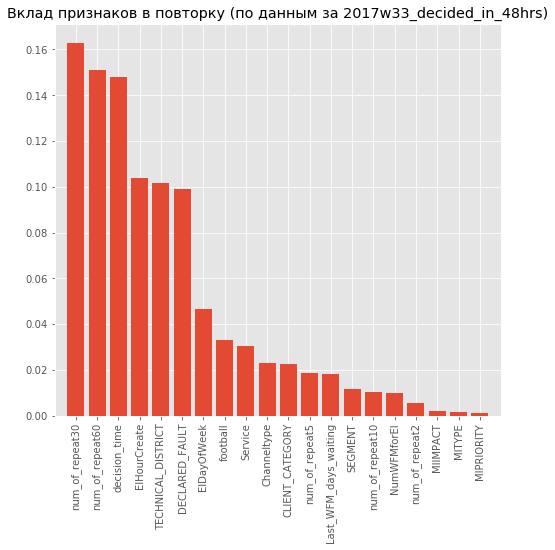

In [300]:
# %%time

data_period = url_to_data.split('.')[0].split('/')[1][4:]

plt.subplots_adjust(left=0.15)
d_first = 20
plt.figure(figsize=(8, 8)).autofmt_xdate() 
plt.title("Вклад признаков в повторку (по данным за {0})".format(data_period))
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])
plt.savefig("FeaturesImportances{0}.pdf".format(data_period))

In [232]:
%%time
print(len(feature_names))
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

21
Index(['num_of_repeat60', 'TECHNICAL_DISTRICT', 'decision_time',
       'DECLARED_FAULT', 'EIHourCreate', 'num_of_repeat30', 'EIDayOfWeek',
       'football'],
      dtype='object')
Wall time: 2 ms


In [233]:
# %%time
# from sklearn import ensemble
# gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
# gbt.fit(X_train, y_train)

# err_train = np.mean(y_train != gbt.predict(X_train))
# err_test = np.mean(y_test != gbt.predict(X_test))
# print(err_train, err_test)

In [ ]:
%%time
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train[best_features_names], y_train)

err_train = np.mean(y_train != gbt.predict(X_train[best_features_names]))
err_test = np.mean(y_test != gbt.predict(X_test[best_features_names]))
print(err_train, err_test)